El dataset de **startups** contiene variables como gastos en investigación y desarrollo (I+D), costos administrativos, gastos en marketing, ubicación geográfica y beneficios netos. Este tipo de datos es esencial para entender el rendimiento financiero y operativo de una startup, lo cual es crítico para la toma de decisiones tanto para los inversionistas como para la administración de la empresa.


a. Análisis Exploratorio de Datos (EDA) ¿Qué conclusiones puede sacar con respecto a las distribuciones de las variables numéricas y las relaciones entre ellas?


b. Modelo de Regresión Lineal para Predecir Beneficio Neto.


c. Cual es la intuicion detrás de la formula de la regresion resultante.


d. Cual es el error promedio? y el error elevado al cuadrado? ¿Que significa?


e. Analice del Sector de la Industria en el Beneficio Neto.


f. Cual es la relacion entre las series y el profit? Es importante hay alguna particularidad? (Hint)

# EDA


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("emprendimientos.csv")

In [35]:
df.describe().applymap(lambda x: round(x))

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
count,70,70,70,70,70,70,70,70
mean,34,73646,110300,212933,108075,120746,264,323233
std,20,46644,39611,129284,49145,55479,141,135323
min,0,0,2743,0,-21314,-14886,10,24436
25%,17,37579,96963,120540,78931,83429,145,219525
50%,34,73051,118609,212716,106661,119811,262,322938
75%,52,106301,136547,302424,140623,160098,393,413511
max,69,175623,182646,494431,192262,227096,497,614542


In [33]:
df.dropna()

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.200000,136897.800000,471784.100000,New York,192261.830000,Energy,227095.722346,289,Series A,608681.900000
1,1,162597.700000,151377.590000,443898.530000,California,191792.060000,Tech,224711.757208,217,Series B,595276.120000
2,2,153441.510000,101145.550000,407934.540000,Florida,191050.390000,Finance,222717.429984,407,Series C,509080.090000
3,3,144372.410000,118671.850000,383199.620000,New York,182901.990000,Finance,214017.365199,383,Series A,501871.470000
4,4,142107.340000,91391.770000,366168.420000,Florida,166187.940000,Finance,196476.965990,351,Series B,457560.190000
...,...,...,...,...,...,...,...,...,...,...,...
65,65,134093.502036,47327.344651,26681.272559,California,105423.930052,Tech,120378.804381,335,Seed,74008.617209
66,66,83460.960473,102975.139152,287058.802746,New York,-21313.506762,Healthcare,-14885.847169,430,Seed,390033.941898
67,67,111737.965689,125193.850785,73364.287453,New York,187372.314677,Finance,197551.192890,367,Seed,198558.138238
68,68,28077.387719,2743.241602,294652.768452,New York,62478.033370,Healthcare,64877.719983,258,Seed,297396.010053


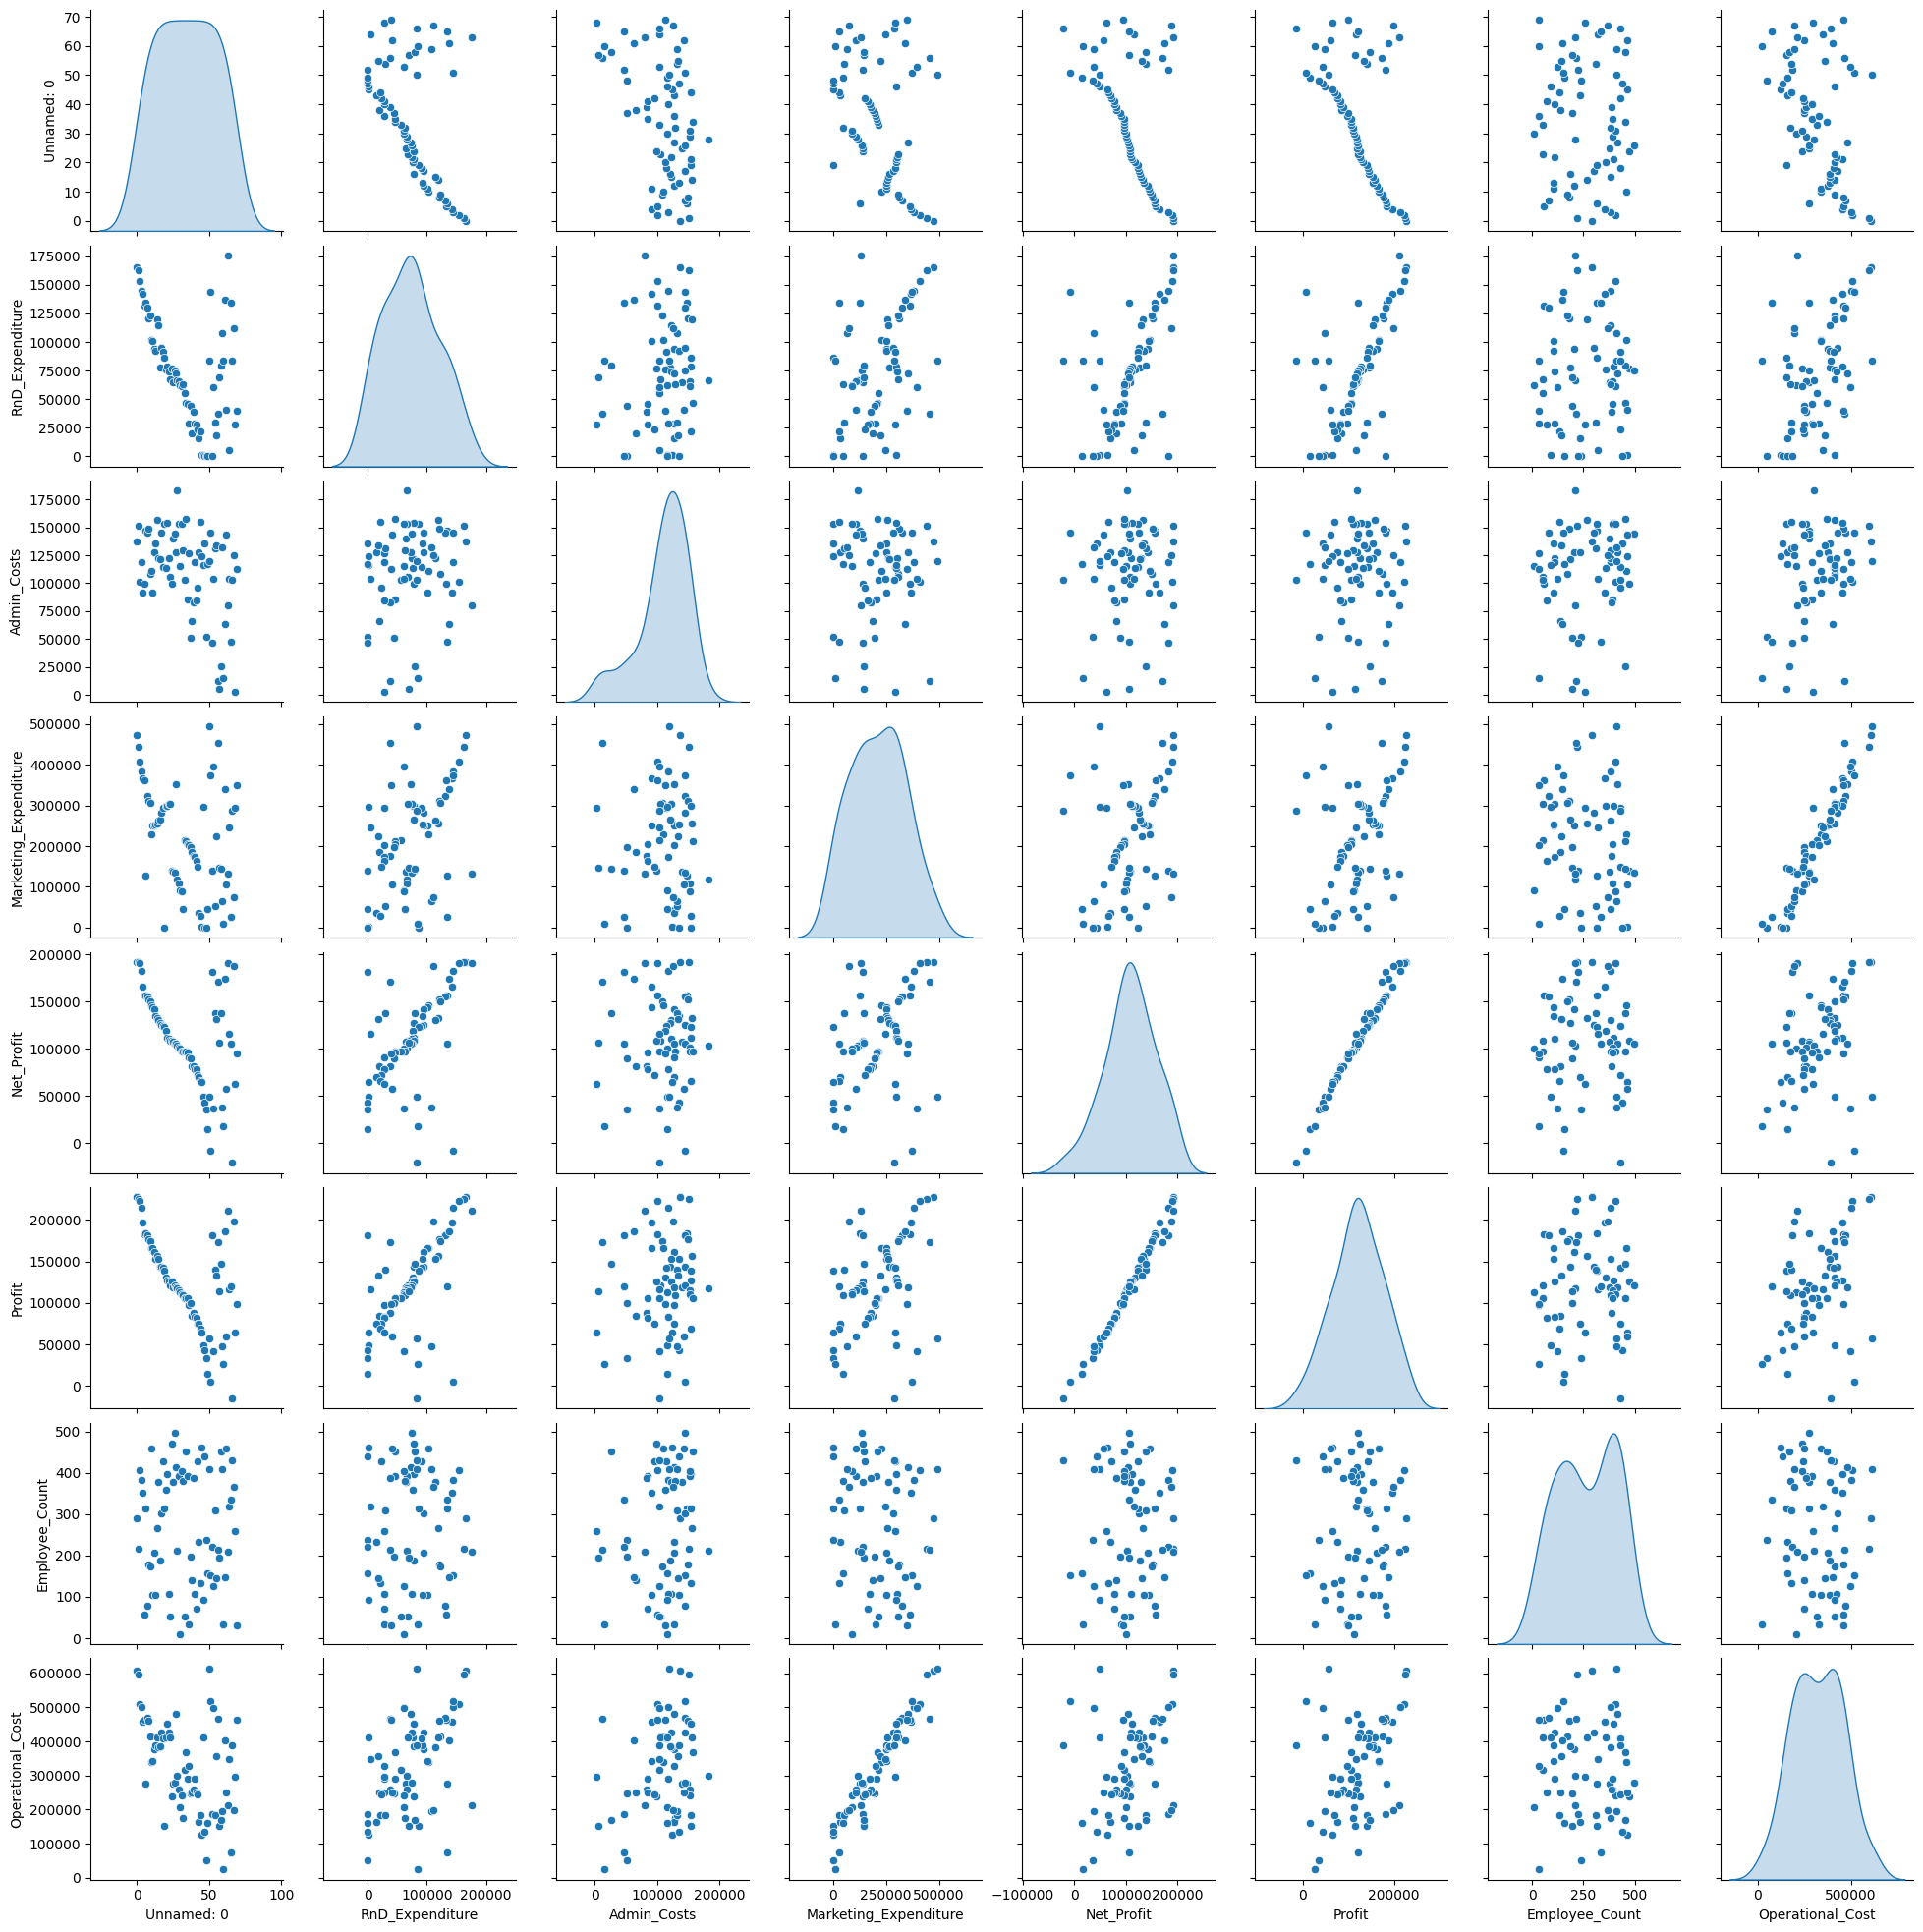

In [36]:
sns.pairplot(df, diag_kind='kde')
plt.show()

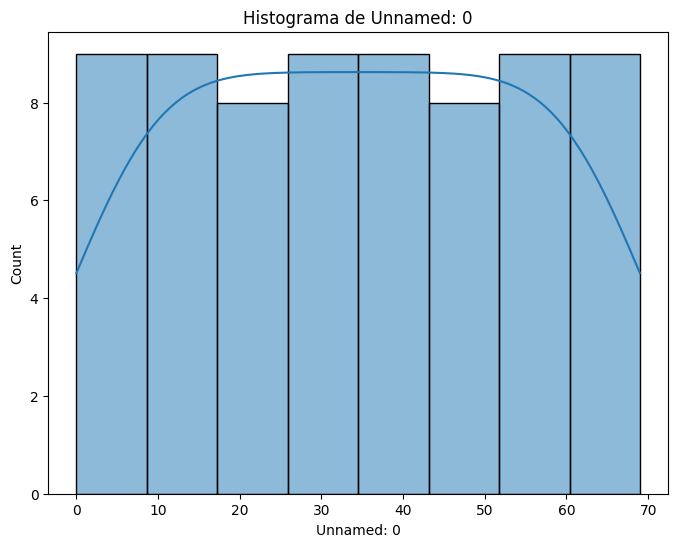

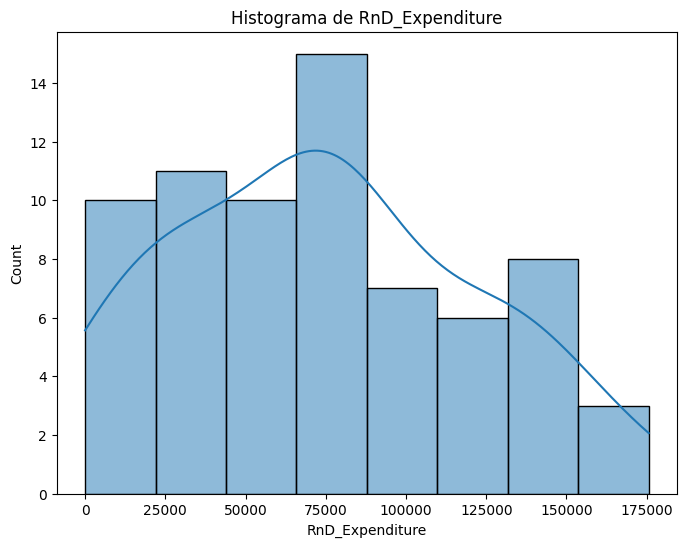

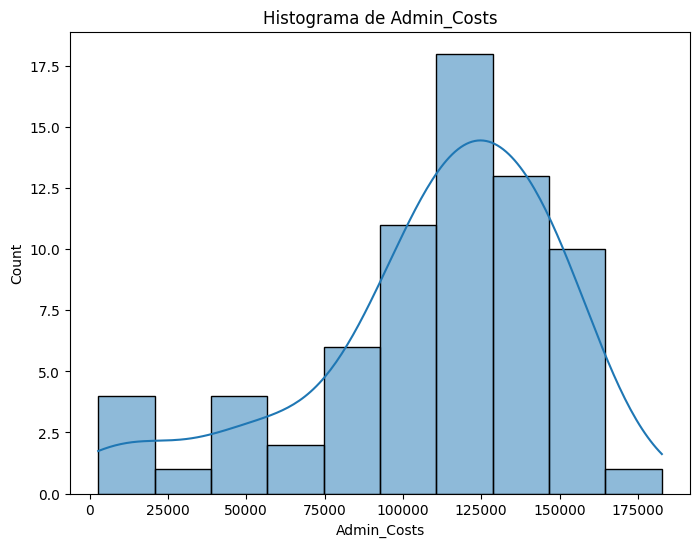

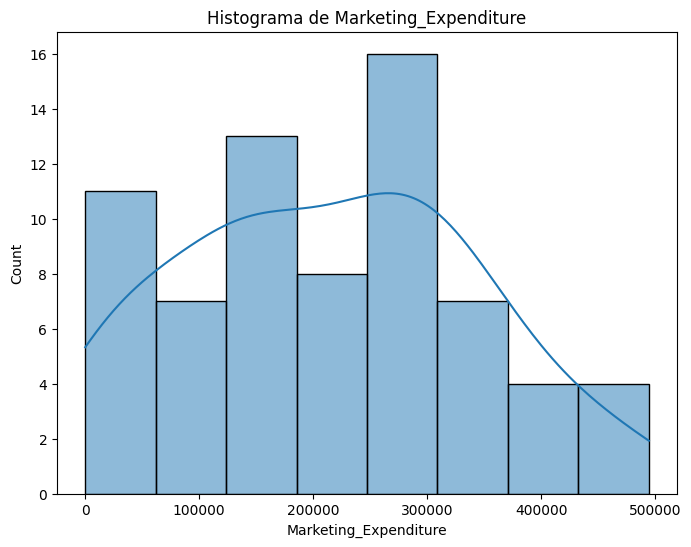

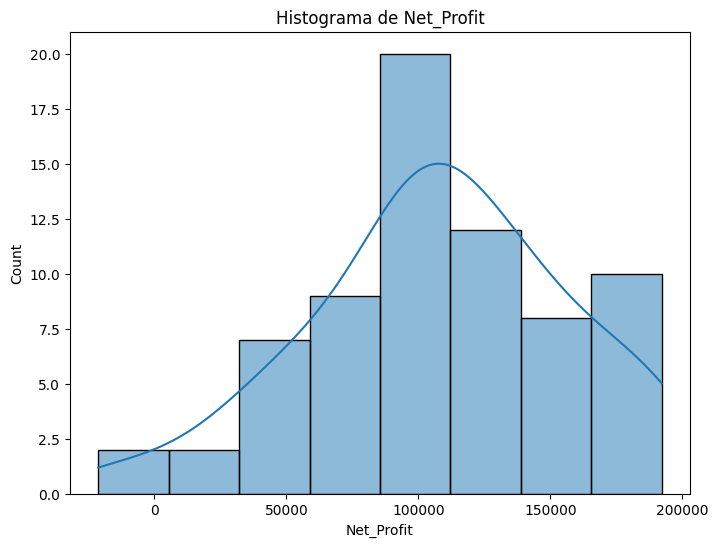

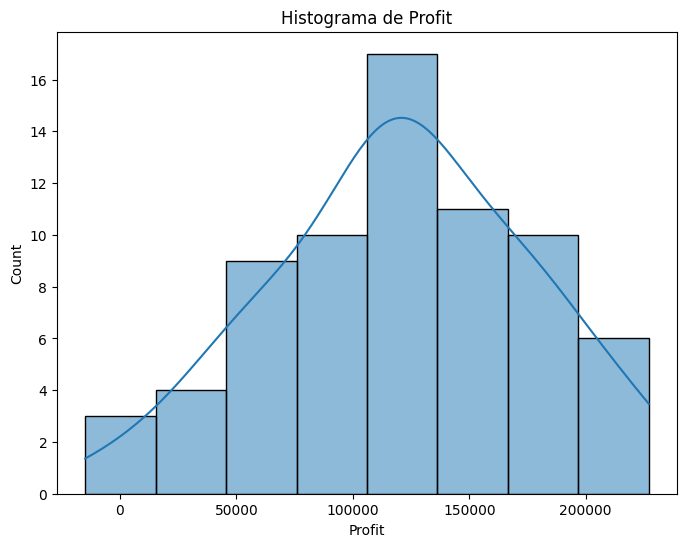

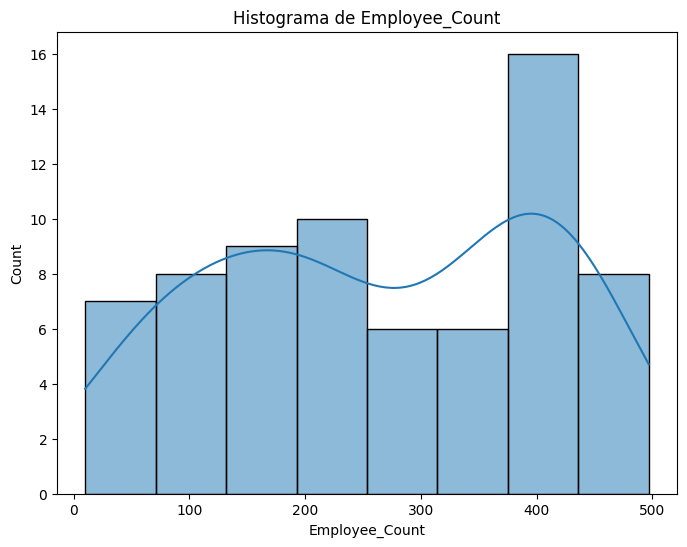

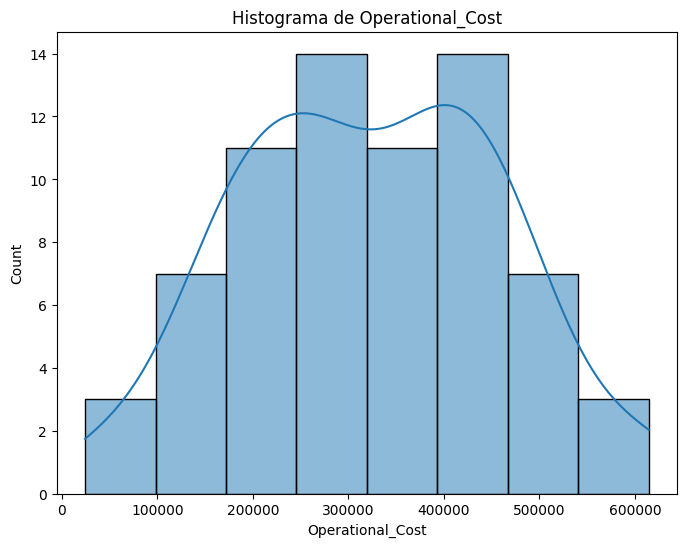

In [40]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histograma de {column}')
    plt.show()

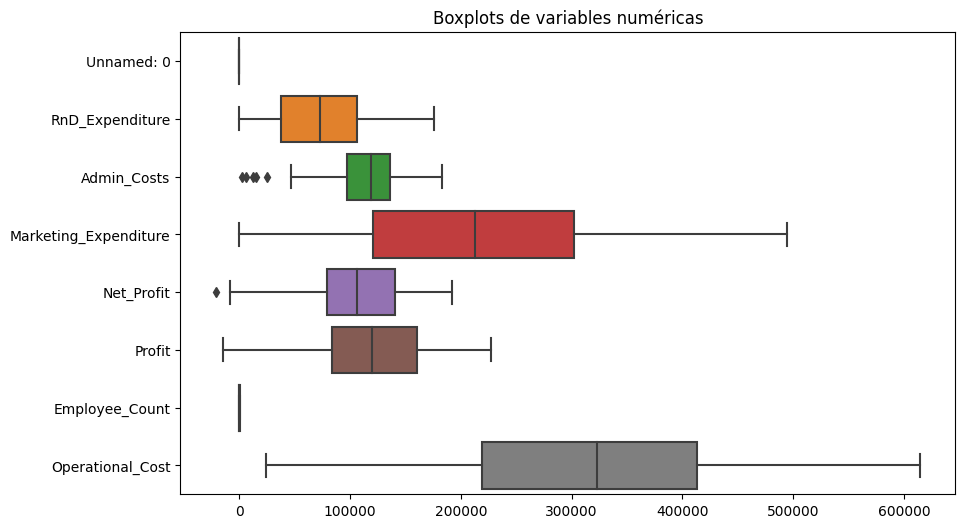

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns.columns], orient='h')
plt.title('Boxplots de variables numéricas')
plt.show()

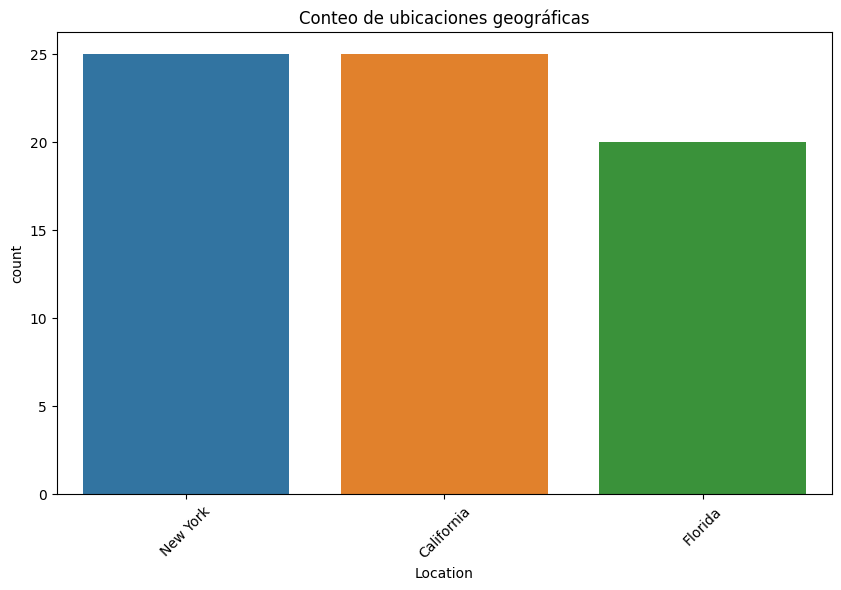

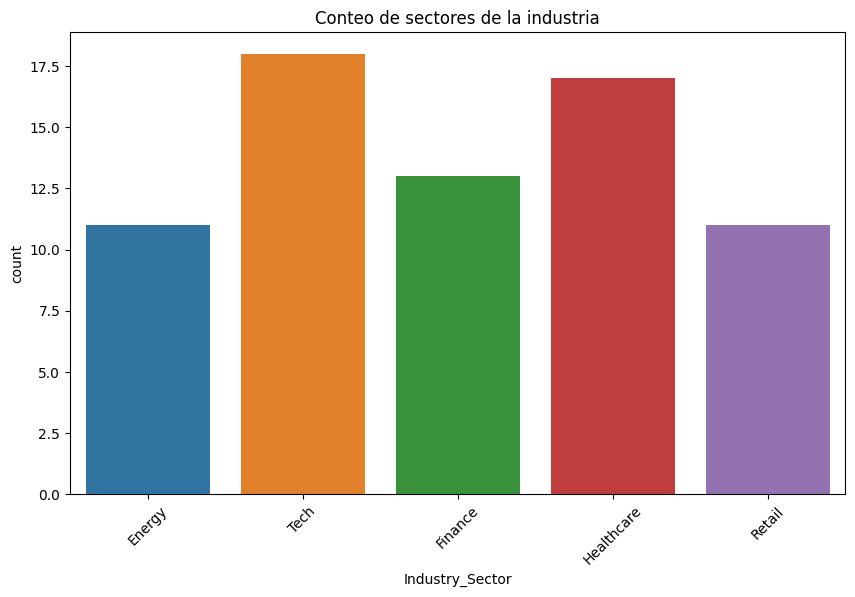

In [42]:
# Variables categóricas 'Location' y 'Industry_Sector'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location')
plt.title('Conteo de ubicaciones geográficas')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Industry_Sector')
plt.title('Conteo de sectores de la industria')
plt.xticks(rotation=45)
plt.show()

ANALISIS:

# MODELO DE REGRESION LINEAL


In [48]:
import statsmodels.api as sm

# Definir las variables independientes (X) y la variable objetivo (y)
X = df[['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure']]
y = df['Net_Profit']

# Agregar una constante para el término independiente (intercepto)
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Obtener un resumen del modelo de regresión
summary = model.summary()

print(summary)


                            OLS Regression Results                            
Dep. Variable:             Net_Profit   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.452
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.80e-05
Time:                        23:16:24   Log-Likelihood:                -842.49
No. Observations:                  70   AIC:                             1693.
Df Residuals:                      66   BIC:                             1702.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.614e+

El fragmento que proporcionaste es un resumen de un modelo de regresión lineal. A continuación, se explica el significado de los valores en el resumen:

"const": Esto representa el término independiente (intercepto) en la ecuación de regresión. En este caso, el valor es 66,140 (6.614e+04). Esto significa que cuando todas las demás variables (RnD_Expenditure, Admin_Costs y Marketing_Expenditure) son iguales a cero, se espera que el Beneficio Neto sea de 66,140.

"RnD_Expenditure": El coeficiente para esta variable es 0.5170. Significa que un aumento de una unidad en RnD_Expenditure se asocia con un aumento de 0.5170 unidades en el Beneficio Neto, manteniendo las otras variables constantes.

"Admin_Costs": El coeficiente para esta variable es -0.0503. Indica que un aumento de una unidad en Admin_Costs se asocia con una disminución de 0.0503 unidades en el Beneficio Neto, manteniendo las otras variables constantes. En este caso, el coeficiente es negativo, lo que sugiere que un aumento en los costos administrativos se relaciona con una disminución en el Beneficio Neto.

"Marketing_Expenditure": El coeficiente para esta variable es 0.0442. Significa que un aumento de una unidad en Marketing_Expenditure se asocia con un aumento de 0.0442 unidades en el Beneficio Neto, manteniendo las otras variables constantes.

"std err": Representa el error estándar de los coeficientes, que mide la precisión de las estimaciones de los coeficientes.

"t": El valor t es una estadística de prueba que evalúa si un coeficiente es significativamente diferente de cero. Cuanto mayor sea el valor t en valor absoluto, más significativo es el coeficiente.

"P>|t|": Es el valor p asociado con la prueba t. Indica la probabilidad de que el coeficiente sea igual a cero. Un valor p bajo (generalmente menos de 0.05) sugiere que el coeficiente es significativo.

"[0.025 0.975]": Estos son los intervalos de confianza del 95% para los coeficientes. En otras palabras, son los rangos dentro de los cuales es probable que caiga el valor real del coeficiente con un 95% de confianza.

En resumen, el resumen proporciona información sobre cómo cada variable independiente (RnD_Expenditure, Admin_Costs, Marketing_Expenditure) afecta al Beneficio Neto en el modelo de regresión, así como su significancia estadística.

Intuición detrás de la fórmula de la regresión resultante:

La fórmula de regresión lineal tiene la forma general: y = b0 + b1*x1 + b2*x2 + ... + bn*xn, donde "y" es la variable objetivo (en este caso, Beneficio Neto), "b0" es el intercepto (ordenada al origen) y "b1, b2, ..., bn" son los coeficientes de regresión que representan la relación entre las variables independientes (RnD_Expenditure, Admin_Costs, Marketing_Expenditure) y la variable objetivo. La intuición detrás de esta fórmula es que estamos tratando de encontrar una relación lineal entre las variables independientes y el Beneficio Neto.

Error promedio y error elevado al cuadrado:

El error promedio se refiere al error medio entre las predicciones del modelo y los valores reales. En este caso, se utiliza el Mean Squared Error (MSE) como medida de error, que es el promedio de las diferencias al cuadrado entre las predicciones y los valores reales. Cuanto menor sea el MSE, mejor será el rendimiento del modelo. El MSE se utiliza para evaluar la calidad de las predicciones del modelo de regresión.

Análisis del Sector de la Industria en el Beneficio Neto:

Puedes realizar un análisis de la influencia del sector de la industria en el Beneficio Neto utilizando análisis de varianza (ANOVA) o pruebas estadísticas para comparar los Beneficios Netos entre diferentes sectores de la industria. Esto te ayudará a determinar si el sector de la industria tiene un impacto significativo en el Beneficio Neto

Relación entre las variables y el Beneficio Neto:

Para analizar la relación entre las variables independientes (RnD_Expenditure, Admin_Costs, Marketing_Expenditure) y el Beneficio Neto, puedes examinar los coeficientes de regresión del modelo. Los coeficientes te indicarán cómo cada variable independiente contribuye al Beneficio Neto. Si los coeficientes son positivos, significa que un aumento en la variable independiente está asociado con un aumento en el Beneficio Neto, y viceversa. Si los coeficientes son significativos, entonces estas variables son importantes para predecir el Beneficio Neto. Además, puedes utilizar gráficos de dispersión para visualizar la relación entre estas variables y el Beneficio Neto.

Para analizar el efecto del sector de la industria en el Beneficio Neto, puedes utilizar pruebas estadísticas, como el análisis de varianza (ANOVA), para determinar si existen diferencias significativas en el Beneficio Neto entre diferentes sectores de la industria. Aquí tienes un ejemplo de cómo realizar este análisis en Python utilizando la biblioteca scipy:

In [49]:
from scipy.stats import f_oneway

# Realizar el análisis de varianza (ANOVA) para comparar el Beneficio Neto entre los sectores de la industria
result = f_oneway(*[df['Net_Profit'][df['Industry_Sector'] == sector] for sector in df['Industry_Sector'].unique()])

# Imprimir el resultado del ANOVA
print("Resultado del ANOVA:")
print(result)

# Interpretación del resultado
if result.pvalue < 0.05:
    print("Hay diferencias significativas en el Beneficio Neto entre los sectores de la industria.")
else:
    print("No hay diferencias significativas en el Beneficio Neto entre los sectores de la industria.")


Resultado del ANOVA:
F_onewayResult(statistic=1.7135362927526463, pvalue=0.15768887798901582)
No hay diferencias significativas en el Beneficio Neto entre los sectores de la industria.


analizar la relación entre las variables independientes (RnD_Expenditure, Admin_Costs, Marketing_Expenditure) y el Beneficio Neto (Profit) utilizando gráficos de dispersión, cálculo de correlaciones y visualización de residuos del modelo de regresión:

Creará gráficos de dispersión para visualizar las relaciones entre las variables independientes y el Beneficio Neto.

Calculará las correlaciones de Pearson para evaluar la relación lineal entre las variables.

Ajustará un modelo de regresión lineal para obtener coeficientes y estadísticas de regresión.

Generará un gráfico de residuos para verificar si el modelo captura adecuadamente la relación entre las variables.


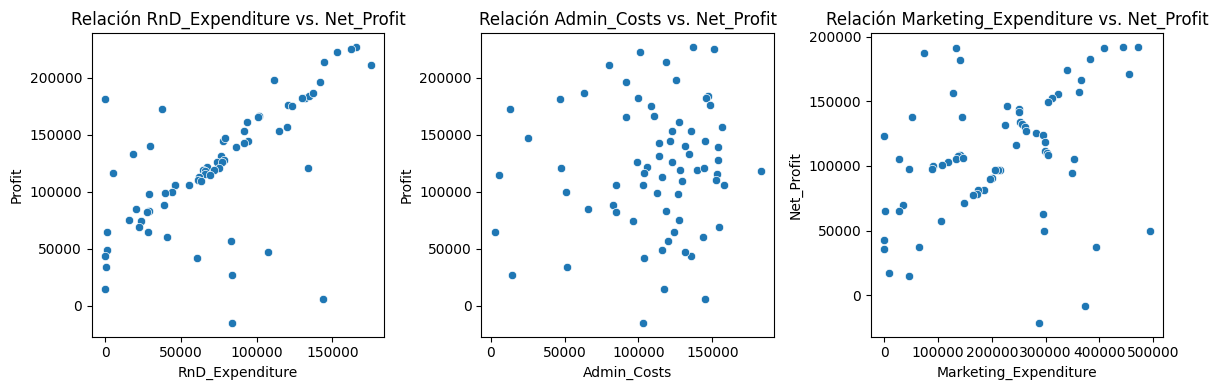

Correlación RnD_Expenditure y Net_Profit: 0.54
Correlación Admin_Costs y Net_Profit: 0.03
Correlación Marketing_Expenditure y Net_Profit: 0.33
                            OLS Regression Results                            
Dep. Variable:             Net_Profit   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.452
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.80e-05
Time:                        23:35:45   Log-Likelihood:                -842.49
No. Observations:                  70   AIC:                             1693.
Df Residuals:                      66   BIC:                             1702.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|  

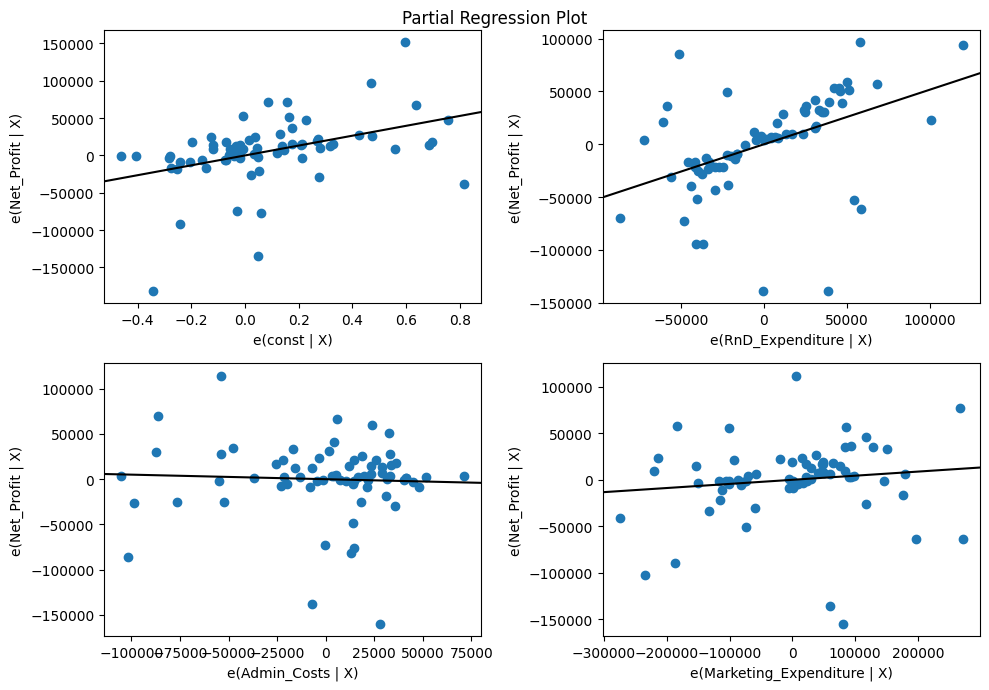

In [59]:
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

# Gráficos de dispersión para explorar relaciones
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.scatterplot(data=df, x="RnD_Expenditure", y="Profit")
plt.title("Relación RnD_Expenditure vs. Net_Profit")

plt.subplot(132)
sns.scatterplot(data=df, x="Admin_Costs", y="Profit")
plt.title("Relación Admin_Costs vs. Net_Profit")

plt.subplot(133)
sns.scatterplot(data=df, x="Marketing_Expenditure", y="Net_Profit")
plt.title("Relación Marketing_Expenditure vs. Net_Profit")

plt.tight_layout()
plt.show()

# Calcular correlaciones de Pearson
correlation_rnd, _ = pearsonr(df["RnD_Expenditure"], df["Net_Profit"])
correlation_admin, _ = pearsonr(df["Admin_Costs"], df["Net_Profit"])
correlation_marketing, _ = pearsonr(df["Marketing_Expenditure"], df["Net_Profit"])

print(f"Correlación RnD_Expenditure y Net_Profit: {correlation_rnd:.2f}")
print(f"Correlación Admin_Costs y Net_Profit: {correlation_admin:.2f}")
print(f"Correlación Marketing_Expenditure y Net_Profit: {correlation_marketing:.2f}")

# Modelo de regresión para analizar coeficientes y residuos
X = df[['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure']]
X = sm.add_constant(X)
y = df['Net_Profit']

model = sm.OLS(y, X).fit()
print(model.summary())

# Gráfico de residuos
import statsmodels.api as sm
fig = plt.figure(figsize=(10,7))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

Jupyter DataTables

In [ ]:
pip install jupyter-datatables

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd

from jupyter_datatables import init_datatables_mode


In [ ]:
init_datatables_mode()

CommError: Comms haven't been initialized properly.. HINT: Try reloading <F5> the window.